<b>Fraud  Loan Prediction</b>
Whether to give loan to a person or not based on the information .

Dataset: https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

<b>Importing Necessary Libraries</b>

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import missingno as msno 
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [223]:
# Reading data
loan_data=pd.read_csv("loan_prediction.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
loan_data.shape

(614, 13)

<b>Observation:</b>
There are 614 rows and 13 columns in the dataset.

In [225]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<b>Observation:</b>
There are 13 attributes, out of which 8 attributes are of object data type and 4 attributes are of float datatype and 1 attribute is of int datatype.

<b>Checking Null Values in the dataset</b>

In [226]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

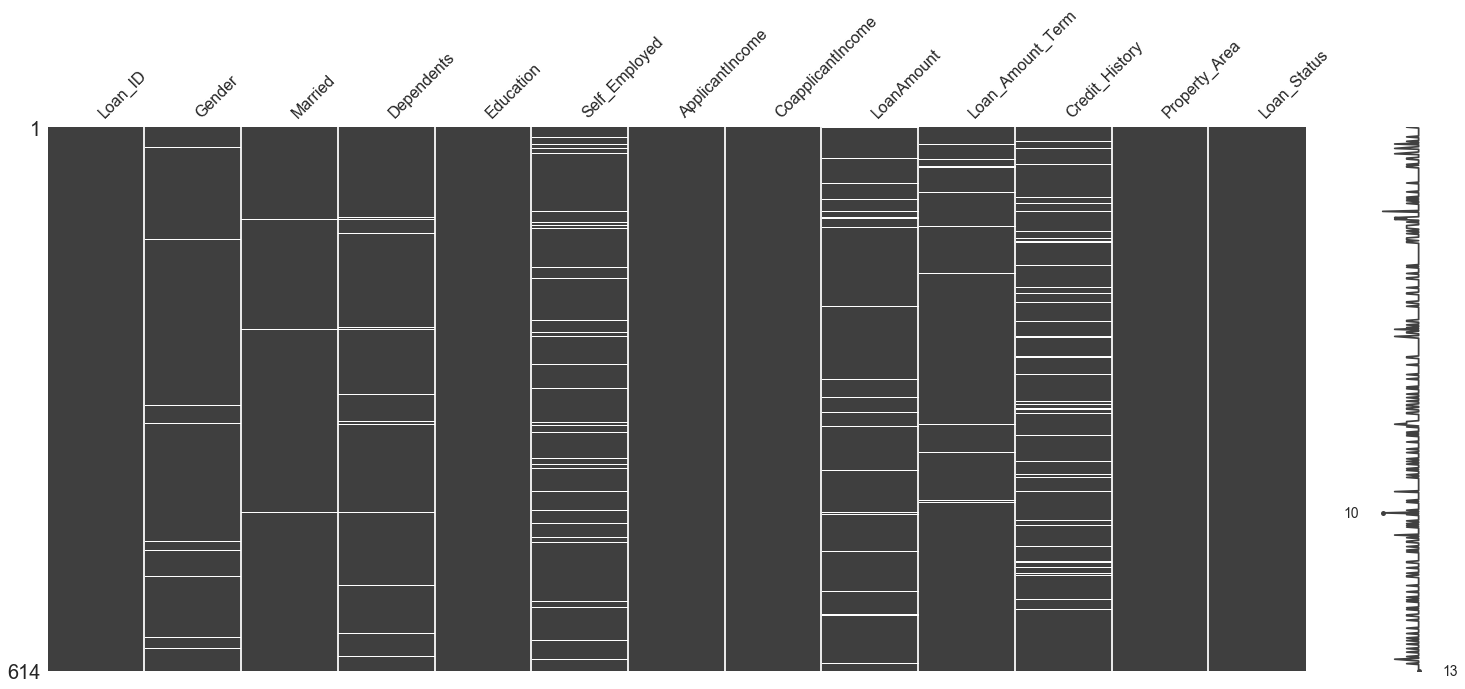

In [227]:
msno.matrix(loan_data) 
plt.show()

<b>Observation:</b>
<li>From the above visualization, it is clear that there are missing values in attributes (Gender, Married, Dependents, Self_Employed, LoanAmount,Loan_Amount_Term,Credit_History).</li>

# Exploratory Data Analysis

<b>Univariate Analysis</b>

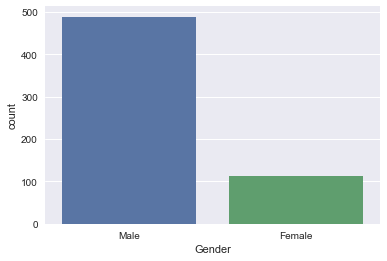

In [52]:
sns.countplot(loan_data["Gender"])
plt.show()

<b>Observation:</b>
There are more Males.

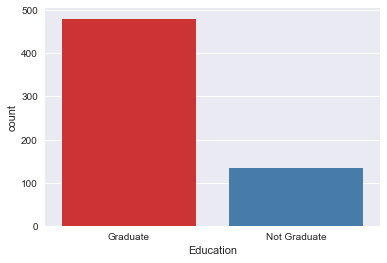

In [74]:
sns.countplot(loan_data["Education"],palette="Set1")
plt.show()

<b>Observation:</b>
There are more people who are Graduated.

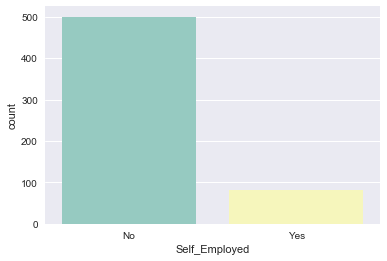

In [60]:
sns.countplot(loan_data["Self_Employed"],palette="Set3")
plt.show()

<b>Observation:</b>
Most of the people are Not Self Employed.

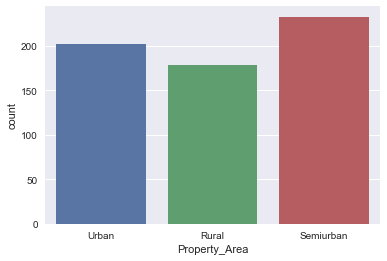

In [67]:
sns.countplot(loan_data["Property_Area"])
plt.show()

<b>Observation:</b>
Most of the people live in the SemiUrban area and some are in Urban and Rural.

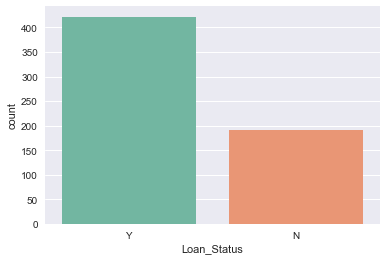

In [70]:
sns.countplot(loan_data["Loan_Status"],palette="Set2")
plt.show()

From the above visualization, it is clear that target variable is unbalance.

<b>Bi-Variate Analysis</b>

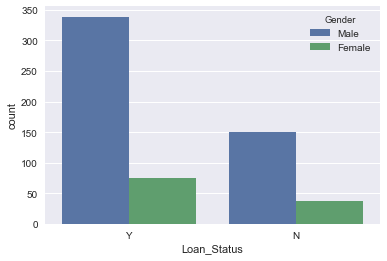

In [77]:
sns.countplot(x="Loan_Status",hue="Gender",data=loan_data)
plt.show()

<b>Observation:</b>
<li> People who are Male has the higher chances of getting loan.</li>

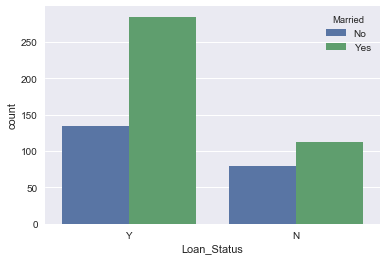

In [83]:
sns.countplot(x="Loan_Status",hue="Married",data=loan_data)
plt.show()

<b> Observation:</b>
Most of the people who are Married has the chances of getting loan approved.

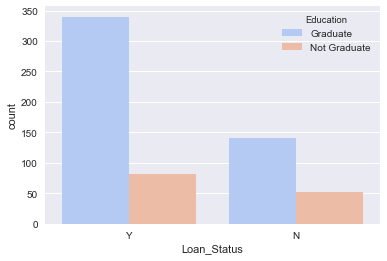

In [106]:
sns.countplot(x="Loan_Status",hue="Education",data=loan_data,palette="coolwarm")
plt.show()

<b>Observation:</b>
People who are graduated has higher chances of getting Loan.

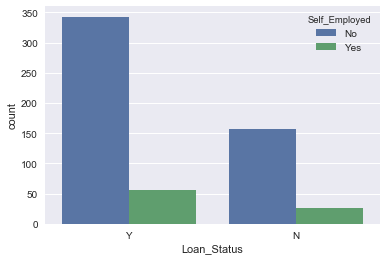

In [86]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=loan_data)
plt.show()

<b>Observation:</b>
Most of People who are Self Employed will get Loan approved.

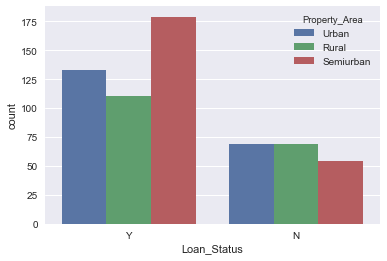

In [91]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=loan_data)
plt.show()

<b>Observation:</b>
People who live in SemiUrban area has higher chances of getting Loan.

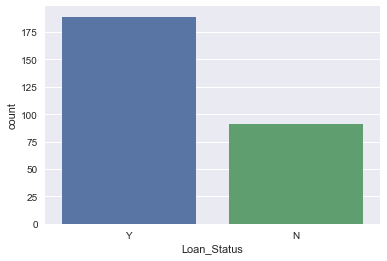

In [133]:
sns.countplot(x="Loan_Status", data=loan_data.loc[loan_data["ApplicantIncome"]>4000],palette="deep")
plt.show()

<b>Observation:</b>
Most of the people who Income greater than 4000 has the higher chances of getting Loan.

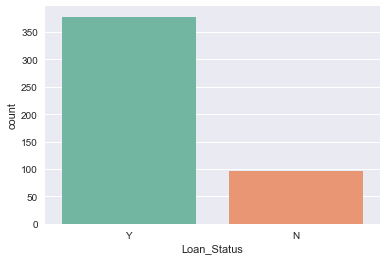

In [139]:
sns.countplot(x="Loan_Status", data=loan_data.loc[loan_data["Credit_History"]==1.0],palette="Set2")
plt.show()

<b>Observation</b>
People who have Credit History of 1.0 has high chances of getting loan.

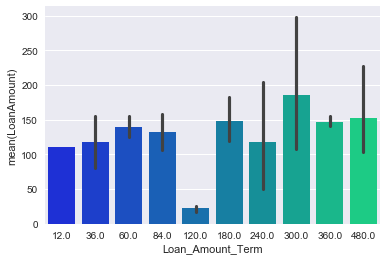

In [172]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=loan_data,palette="winter")
plt.show()

<b>Observation:</b>
Most of the people have Loan Amount Term of 300.

<b>Multi-Variate Analysis</b>

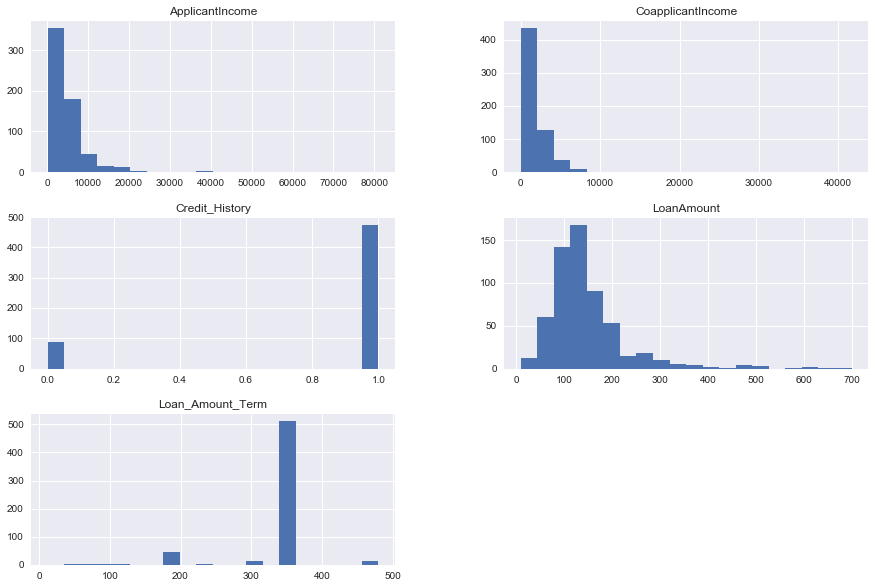

In [157]:
loan_data.hist(figsize=(15,10),grid=True,bins=20);

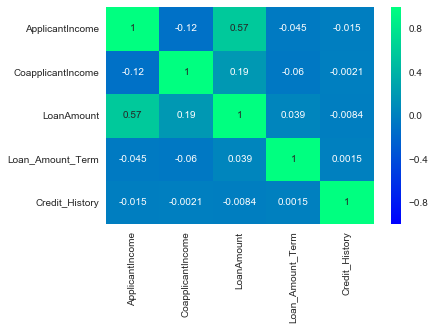

In [164]:
plt.figure(figsize=(6,4))
sns.heatmap(loan_data.corr(), cmap="winter",annot=True)
plt.show()

<b>Observation:</b>
ApplicantIncome and LoanAmount are correlated.

In [228]:
# Removing the unnecessary attribute
loan_data.drop(["Loan_ID"],axis=1,inplace=True)

<b>Summary Statistics</b>

In [198]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02
mean,68.497955,28.006444,11.723971,342.000000,8.421986e-01
std,26.695508,28.952550,2.995877,64.372489,9.333477e-15
min,12.247449,0.000000,3.000000,12.000000,8.421986e-01
25%,53.642329,0.000000,10.012469,360.000000,8.421986e-01
50%,61.745445,34.473218,11.357817,360.000000,8.421986e-01
75%,76.124876,47.929559,12.835487,360.000000,8.421986e-01
max,284.604989,204.124962,26.457513,480.000000,8.421986e-01


<b>Observation:</b>
<li> ApplicantIncome varies from 150 to 81000.</li>
<li> Loan_Amount_Term varies from 12 to 480.</li>

<b>Filling the Null Values</b>

In [229]:
# Filling the missing values of categorical attributes using mode
for column in loan_data[["Gender","Married","Dependents","Self_Employed","Property_Area"]]:
    mode = loan_data[column].mode()
    loan_data[column] = loan_data[column].fillna(mode)[0]

In [230]:
# Filling the missing values of numerical, float attributes using mode
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())
loan_data["Credit_History"]= loan_data["Credit_History"].fillna(loan_data["Credit_History"]).mean()

In [231]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<b>Observation:</b>
There is no Missing Values in the dataset.

<b>Checking the Skewness</b>

In [232]:
loan_data.skew(axis=0)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History       0.000000
dtype: float64

In [233]:
# Treating the skewness in the dataset
for index in loan_data.skew().index:
    if loan_data.skew().loc[index]>0.5:
        loan_data[index]=np.sqrt(loan_data[index])

In [234]:
loan_data.skew(axis=0)

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -2.389680
Credit_History       0.000000
dtype: float64

<b> Divinding the input and output variables</b>

In [235]:
X= loan_data.drop(["Loan_Status"],axis=1)
y= loan_data["Loan_Status"]

<b> Converting Categorical Variables</b>

In [243]:
# Converting independent variables using get_dummies
X=pd.get_dummies(X)

In [244]:
# Lets encode the categorical attributes 
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
y=l.fit_transform(y)

<b> Checking the Outliers</b>

In [245]:
from scipy.stats import zscore
z_score=abs(zscore(loan_data))
print("The shape of dataset before removing outliers",loan_data.shape)
loan_data=loan_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",loan_data.shape)

The shape of dataset before removing outliers (614, 14)
The shape of dataset after removing outliers (614, 14)


In [246]:
# Lets bring the dataset features into same scale
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into Train and Test (70:30) ratio.</b>

In [247]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [253]:
# We will use auc_roc score as the metrics 
def auc_roc_score(classifier,X,y):
    auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        classifier.fit(X_train,y_train)
        y_pred= classifier.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>auc_roc_score:
            auc_roc_score=auc_roc
            auc_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",auc_score," and it is :",round((auc_roc_score),2))

# Machine Learning Models:

As the Target variable is binary, its classification problem, we are implementing XG Boost Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Logistic regession and 

<b>XG Boost Classifier</b>

In [254]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
params={'min_child_weight': [1,5,7],'gamma': [0.5,1.5,2.5],"subsample":[0.4,0.8,1.0],"colsample_bytree":[0.6,0.8,1.0],'max_depth':[2,4,5]}
xg= GridSearchCV(xg, params, cv=5,scoring="roc_auc")
xg.fit(X,y)
xg.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [256]:
xg = XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=5,min_child_weight=1,subsample=0.8)
auc_roc_score(xg,X,y)

Maximum AUC_ROC Score corresponding to: 76  and it is : 0.58


In [257]:
pred_xg= xg.predict(X_test)
score_xgc= xg.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((score_xgc),3))

The accuracy of the XG Boost Model is: 0.838


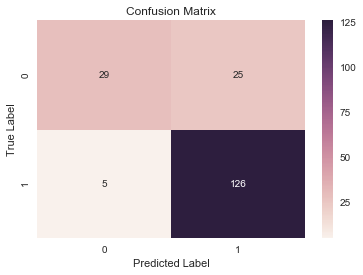

In [258]:
xgb=confusion_matrix(y_test, pred_xg)
df_xg= pd.DataFrame(xgb)
sns.heatmap(df_xg, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 29 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 126 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 25 observation which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 5 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [259]:
print(classification_report(y_test,pred_xg))

             precision    recall  f1-score   support

          0       0.85      0.54      0.66        54
          1       0.83      0.96      0.89       131

avg / total       0.84      0.84      0.83       185



In [260]:
mean_xgc=cross_val_score(xg, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(xg, X,y,cv=5,scoring="roc_auc").mean())
std_xgc= cross_val_score(xg, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for XG Boost Classifier from mean AUC_ROC score is",cross_val_score(xg, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.5682419850531305
standard deviation for XG Boost Classifier from mean AUC_ROC score is 0.024309557488921014


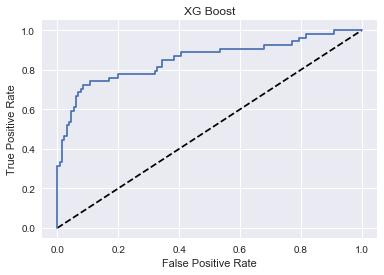

In [261]:
y_pred_prob= xg.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

In [262]:
xg_auc=roc_auc_score(y_test, xg.predict(X_test))
xg_auc

0.7494345490528697

<b> Decision Tree Classifier</b>

In [274]:
parameters= {'criterion':['gini', 'entropy'],'max_depth': [1,2,3,6]}
d_tree=DecisionTreeClassifier()
d_tree = GridSearchCV(d_tree,parameters,cv=5)
d_tree.fit(X,y)
d_tree.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [275]:
d_tree=DecisionTreeClassifier(criterion='gini', max_depth=1)
auc_roc_score(d_tree,X,y)

Maximum AUC_ROC Score corresponding to: 57  and it is : 0.52


In [276]:
pred_dt= d_tree.predict(X_test)
dt_score= d_tree.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dt_score),3))

The accuracy of the Decision Tree Model is: 0.719


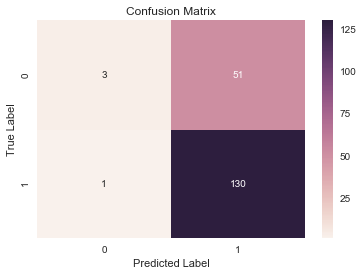

In [277]:
dtc=confusion_matrix(y_test, pred_dt)
df_dt= pd.DataFrame(dtc)
sns.heatmap(df_dt, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 3 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 130 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 1 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [278]:
print(classification_report(y_test,pred_dt))

             precision    recall  f1-score   support

          0       0.75      0.06      0.10        54
          1       0.72      0.99      0.83       131

avg / total       0.73      0.72      0.62       185



In [279]:
mean_dt=cross_val_score(d_tree, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(d_tree, X,y,cv=5,scoring="roc_auc").mean())
s_dt= cross_val_score(d_tree, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(d_tree, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.5046781546626747
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.0033497965175165742


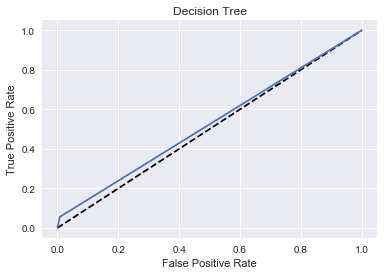

In [280]:
y_pred_prob= d_tree.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [281]:
dt_auc=roc_auc_score(y_test, d_tree.predict(X_test))
dt_auc

0.5239609838846481

<b>Random Forest Classifier</b>

In [284]:
rf= RandomForestClassifier()
parameters= {'n_estimators':[4,6,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[3,5,7]}
rf= GridSearchCV(rf,parameters)
rf.fit(X,y)
rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 4}

In [285]:
rf=RandomForestClassifier(criterion='gini', max_depth=5,max_features='log2',min_samples_leaf=7,min_samples_split=2,n_estimators=4)
auc_roc_score(rf,X,y)

Maximum AUC_ROC Score corresponding to: 53  and it is : 0.55


In [286]:
pred_rf= rf.predict(X_test)
score_rf= rf.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((score_rf),3))

The accuracy of the Random Forest Classifier is: 0.719


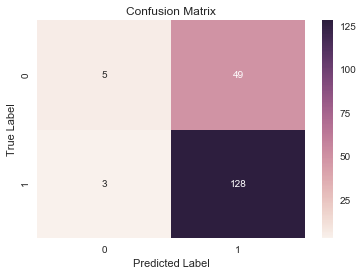

In [287]:
rfc=confusion_matrix(y_test, pred_rf)
df_rf= pd.DataFrame(rfc)
sns.heatmap(df_rf, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 5 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 128 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 49 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 3 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [291]:
print(classification_report(y_test,pred_rf))

             precision    recall  f1-score   support

          0       0.62      0.09      0.16        54
          1       0.72      0.98      0.83       131

avg / total       0.69      0.72      0.64       185



In [292]:
mean_rf=cross_val_score(rf, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(rf, X,y,cv=5,scoring="roc_auc").mean())
std_rf= cross_val_score(rf, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(rf, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.4989918234500278
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.04083755924161151


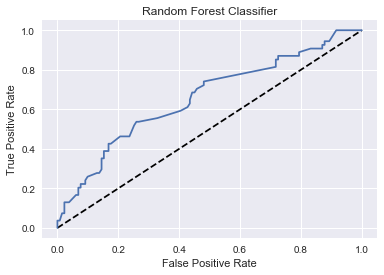

In [293]:
y_pred_prob= rf.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [294]:
rf_auc=roc_auc_score(y_test, rf.predict(X_test))
rf_auc

0.534845914616907

<b>Gradient Boosting Classifier</b>

In [296]:
gbc = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
gbc= GridSearchCV(estimator=gbc, param_grid= parameters, cv=5, n_jobs=-1)
gbc.fit(X,y)
gbc.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.1}

In [297]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=10,subsample=0.1)
auc_roc_score(gbc,X,y)

Maximum AUC_ROC Score corresponding to: 44  and it is : 0.52


In [298]:
pred_gbc= gbc.predict(X_test)
gbc_score= gbc.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((gbc_score),3))

The accuracy of the Grading Boosting Model is: 0.708


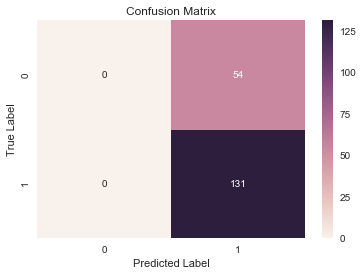

In [299]:
gcb=confusion_matrix(y_test, pred_gbc)
df_gb= pd.DataFrame(gcb)
sns.heatmap(df_gb, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 0  observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 131 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 54 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 0 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [300]:
print(classification_report(y_test,pred_gbc))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        54
          1       0.71      1.00      0.83       131

avg / total       0.50      0.71      0.59       185



In [301]:
mean_gbc=cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").mean())
std_gbc= cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient Boosting from mean AUC_ROC score is",cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.5020733961600835
standard deviation for Gradient Boosting from mean AUC_ROC score is 0.052754378758905186


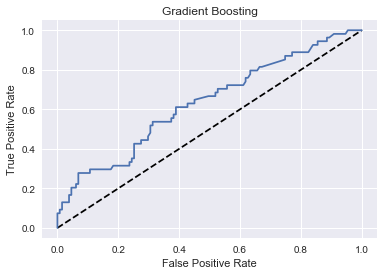

In [302]:
y_pred_prob= gbc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [303]:
gb_auc=roc_auc_score(y_test, gbc.predict(X_test))
gb_auc

0.5

<b> Logistic Regression</b>

In [304]:
log_r=LogisticRegression()
param= {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
log_r=GridSearchCV(log_r,param,cv=10)
log_r.fit(X,y)
log_r.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [305]:
log_r=LogisticRegression(C=0.001,penalty='l2')
auc_roc_score(log_r,X,y)

Maximum AUC_ROC Score corresponding to: 42  and it is : 0.5


In [306]:
pred_log = log_r.predict(X_test)
log_score= log_r.score(X_test, y_test)
print("The accuracy of the Logistic Regresion is", round((log_score),3))

The accuracy of the Logistic Regresion is 0.708


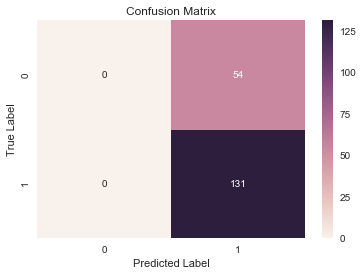

In [308]:
lr=confusion_matrix(y_test, pred_log)
cm_lg= pd.DataFrame(lr)
sns.heatmap(cm_lg, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 0 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 131 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 54 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 0 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [310]:
print(classification_report(y_test, pred_log))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        54
          1       0.71      1.00      0.83       131

avg / total       0.50      0.71      0.59       185



In [311]:
mean_log=cross_val_score(log_r, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(log_r, X,y,cv=5,scoring="roc_auc").mean())
std_log= cross_val_score(log_r, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for logistic from mean AUC_ROC score is",cross_val_score(log_r, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.5565805350480274
standard deviation for logistic from mean AUC_ROC score is 0.053808640949481755


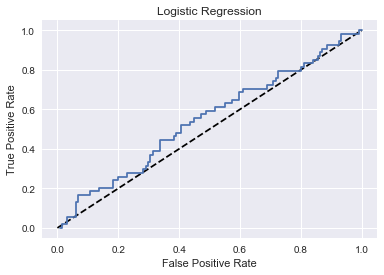

In [312]:
from sklearn.metrics import roc_curve
y_pred_prob= log_r.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)
# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [313]:
lg_auc=roc_auc_score(y_test, log_r.predict(X_test))
lg_auc

0.5

# Evaluation:

In [314]:
#Lets initialise the data frame with columns model and f1_score
data= [["XG Boost Classifier",score_xgc,mean_xgc,std_xgc],["Decision Tree Classifier",dt_score,mean_dt,s_dt],["Random Forest Classifier",score_rf,mean_rf,std_rf],["Gradient Boosting Classifier",gbc_score,mean_gbc,std_gbc],["Logistic Regression",log_score,mean_log,std_log]]
comparsion_table= pd.DataFrame(data, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5])
comparsion_table

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,XG Boost Classifier,0.837838,0.568242,0.024310
2,Decision Tree Classifier,0.718919,0.504678,0.003350
3,Random Forest Classifier,0.718919,0.549661,0.065317
4,Gradient Boosting Classifier,0.708108,0.504592,0.071534
5,Logistic Regression,0.708108,0.556581,0.053809


<b>Observation:</b>
<li>As we are comparing the models, XG Boost Classifier performed better with accuracy of 83.78%, Mean F1 Score of 0.568242 and Standard Deviation from Mean F1 Score of 0.024310.</li>

<b>Saving the Prediction</b>

In [315]:
np.savetxt('Model12.csv',pred_xg,delimiter=',')

In [316]:
#Save the best Model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xg, 'Project121.pkl')

['Project121.pkl']